In [1]:
# Get the distribution
import os
metadata = []
base_path = "/home/pdoyle/ssd/datasets/plant_disease/PlantVillage"
class_num = 0
class_map = {}
for classification in os.listdir(base_path):
    for image in os.listdir(os.path.join(base_path, classification)):
        if len(image) > 12:
            metadata.append({"class": classification, "image": image, "class_num": class_num})
    class_map[classification] = class_num
    class_num += 1

In [2]:
import matplotlib.pyplot as plt

class_nums = {classification: 0 for classification in os.listdir(base_path)}
for record in metadata:
    class_nums[record["class"]] += 1

plt.barh(range(len(class_nums)), list(class_nums.values()), align='center')
plt.yticks(range(len(class_nums)), list(class_nums.keys()))
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
print("Count\tTrain\tTest\tVal\tLabel")
for label, count in sorted(class_nums.items()):
    print(f"{count}\t{int(count * .75)}\t{int(count * .20)}\t{int(count * .05)}\t{label}")
print(f"{sum(class_nums.values())}\tTotal Samples")

Count	Train	Test	Val	Label
997	747	199	49	Pepper__bell___Bacterial_spot
1478	1108	295	73	Pepper__bell___healthy
1000	750	200	50	Potato___Early_blight
1000	750	200	50	Potato___Late_blight
152	114	30	7	Potato___healthy
2127	1595	425	106	Tomato_Bacterial_spot
1000	750	200	50	Tomato_Early_blight
1909	1431	381	95	Tomato_Late_blight
952	714	190	47	Tomato_Leaf_Mold
1771	1328	354	88	Tomato_Septoria_leaf_spot
1676	1257	335	83	Tomato_Spider_mites_Two_spotted_spider_mite
1404	1053	280	70	Tomato__Target_Spot
3208	2406	641	160	Tomato__Tomato_YellowLeaf__Curl_Virus
373	279	74	18	Tomato__Tomato_mosaic_virus
1591	1193	318	79	Tomato_healthy
20638	Total Samples


In [4]:
from PIL import Image
heights = []
widths = []
bad_record = 0
for i, record in enumerate(metadata):
    image = Image.open(os.path.join(base_path, record["class"], record["image"]))
    heights.append(image.height)
    widths.append(image.width)
    if image.mode != "RGB":
        bad_record = i

# one 4 chan RGBA image, get rid of it.
metadata.pop(bad_record)

print(sum(heights) / len(heights))
print(sum(widths) / len(widths))
# all the images are the same size and learning ready 3 chan RGB.

256.0
256.0


In [5]:
from random import shuffle
import random
shuffle(metadata)
train = int(len(metadata) * .75)
test = int(len(metadata) * .20)
random.seed(24)
for record in metadata[:train]:
    record["dataset"] = "train"
for record in metadata[train:train + test]:
    record["dataset"] = "test"
for record in metadata[train + test:]:
    record["dataset"] = "val"

In [6]:
ttv_split = {key: {"total": val, "test": 0, "train": 0, "val": 0} for key, val in class_nums.items()}

for record in metadata:
    ttv_split[record["class"]][record["dataset"]] += 1
ttv_split

{'Tomato_healthy': {'total': 1591, 'test': 322, 'train': 1187, 'val': 82},
 'Tomato_Early_blight': {'total': 1000, 'test': 204, 'train': 740, 'val': 56},
 'Pepper__bell___healthy': {'total': 1478,
  'test': 275,
  'train': 1116,
  'val': 86},
 'Potato___Late_blight': {'total': 1000, 'test': 211, 'train': 734, 'val': 55},
 'Tomato__Tomato_YellowLeaf__Curl_Virus': {'total': 3208,
  'test': 621,
  'train': 2429,
  'val': 158},
 'Potato___healthy': {'total': 152, 'test': 30, 'train': 115, 'val': 7},
 'Tomato_Leaf_Mold': {'total': 952, 'test': 206, 'train': 697, 'val': 49},
 'Pepper__bell___Bacterial_spot': {'total': 997,
  'test': 228,
  'train': 733,
  'val': 36},
 'Tomato_Septoria_leaf_spot': {'total': 1771,
  'test': 330,
  'train': 1345,
  'val': 96},
 'Potato___Early_blight': {'total': 1000,
  'test': 199,
  'train': 752,
  'val': 49},
 'Tomato__Tomato_mosaic_virus': {'total': 373,
  'test': 79,
  'train': 277,
  'val': 17},
 'Tomato_Late_blight': {'total': 1909, 'test': 383, 'train':

In [7]:
# uncomment this to generate a new file.
#import json
#with open("metadata.json", "w") as f:
#    json.dump(metadata, f, indent=2)

In [8]:
# grab an image path from each class
paths = {key: [] for key in class_nums}
for record in metadata:
    if len(paths[record["class"]]) < 5:
        paths[record["class"]].append(os.path.join(base_path, record["class"], record["image"]))
print(sorted(paths.keys()))
print(len(paths.keys()))
print(metadata[0])

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
15
{'class': 'Pepper__bell___healthy', 'image': 'ec363e4b-79c9-460a-a6a4-cac25a71d6ba___JR_HL 8478.JPG', 'class_num': 2, 'dataset': 'train'}


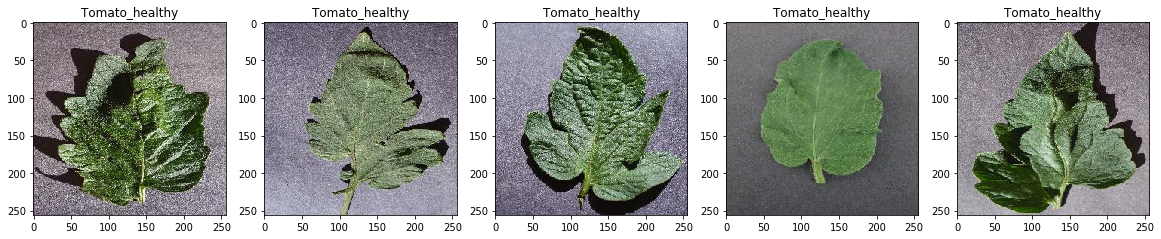

In [9]:
# View some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def show_images(image_paths, title):
    images = [mpimg.imread(image) for image in image_paths]
    plt.figure(figsize=(20,10))
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.title(title)
        plt.imshow(image)
show_images(paths["Tomato_healthy"], "Tomato_healthy")


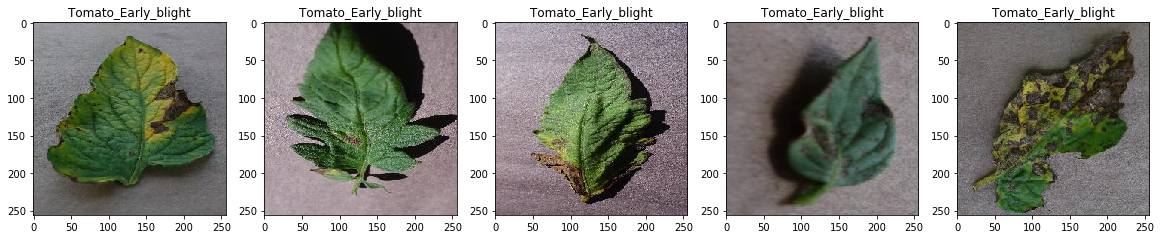

In [10]:
show_images(paths["Tomato_Early_blight"], "Tomato_Early_blight")

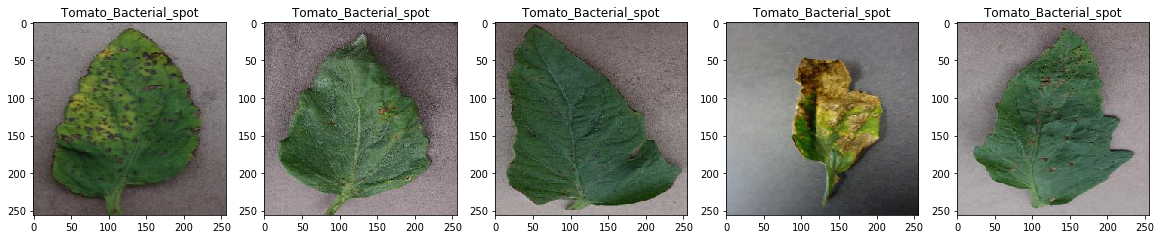

In [11]:
show_images(paths["Tomato_Bacterial_spot"], "Tomato_Bacterial_spot")

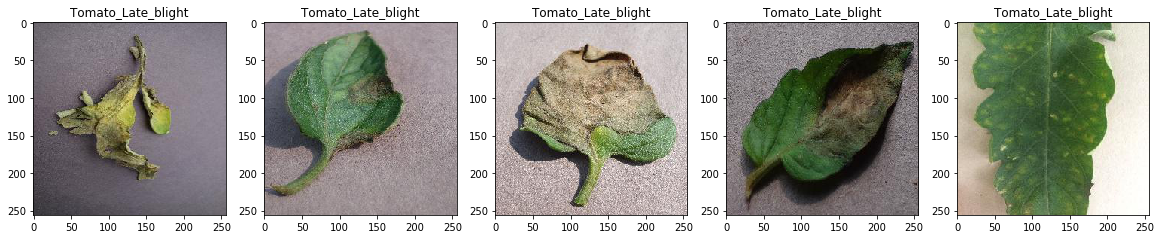

In [12]:
show_images(paths["Tomato_Late_blight"], "Tomato_Late_blight")

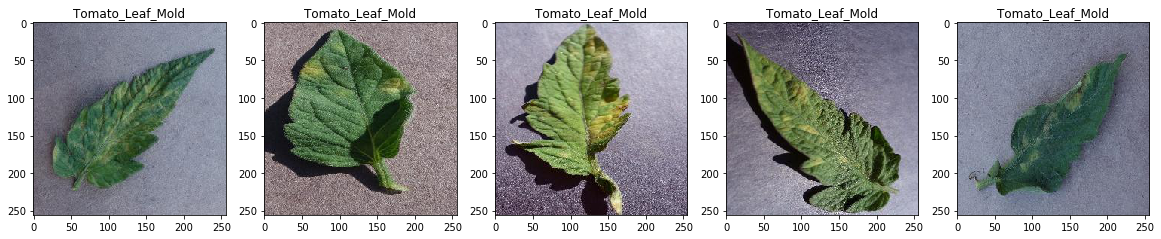

In [13]:
show_images(paths["Tomato_Leaf_Mold"], "Tomato_Leaf_Mold")

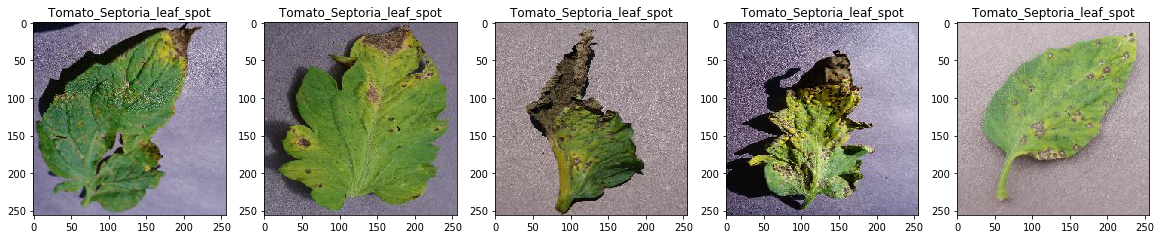

In [14]:
show_images(paths["Tomato_Septoria_leaf_spot"], "Tomato_Septoria_leaf_spot")

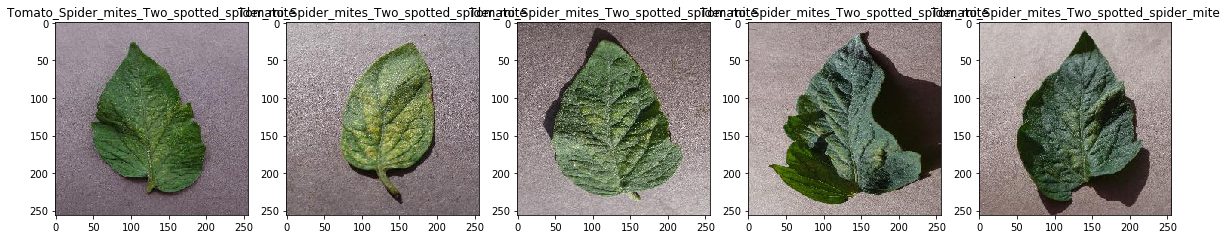

In [15]:
show_images(paths["Tomato_Spider_mites_Two_spotted_spider_mite"], "Tomato_Spider_mites_Two_spotted_spider_mite")

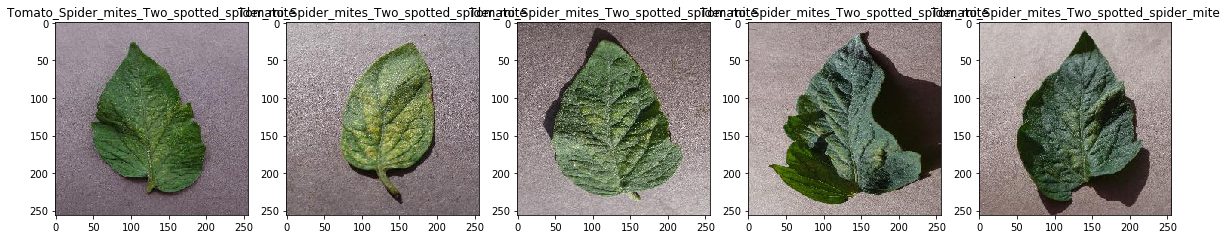

In [16]:
show_images(paths["Tomato_Spider_mites_Two_spotted_spider_mite"], "Tomato_Spider_mites_Two_spotted_spider_mite")

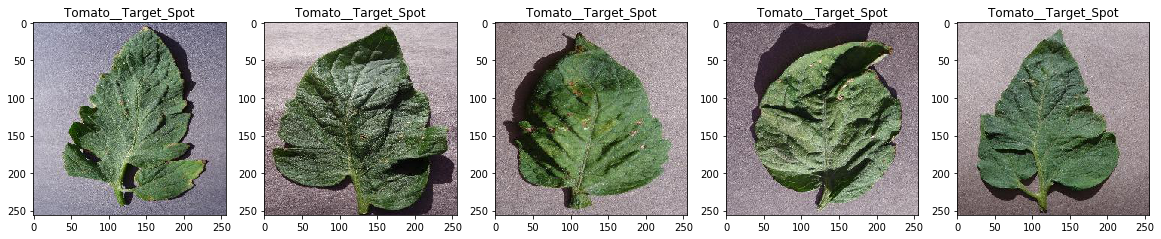

In [17]:
show_images(paths["Tomato__Target_Spot"], "Tomato__Target_Spot")

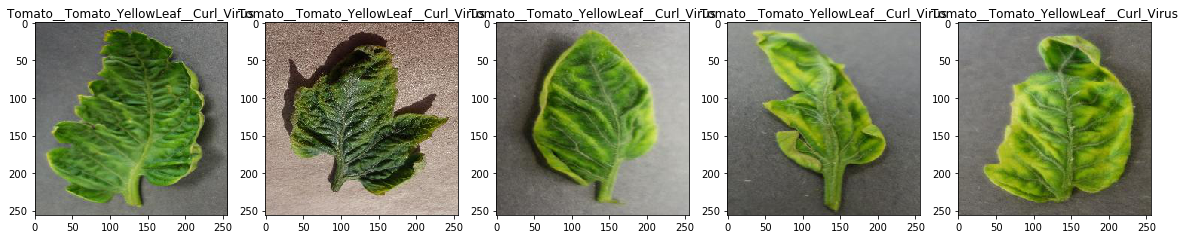

In [18]:
show_images(paths["Tomato__Tomato_YellowLeaf__Curl_Virus"], "Tomato__Tomato_YellowLeaf__Curl_Virus")

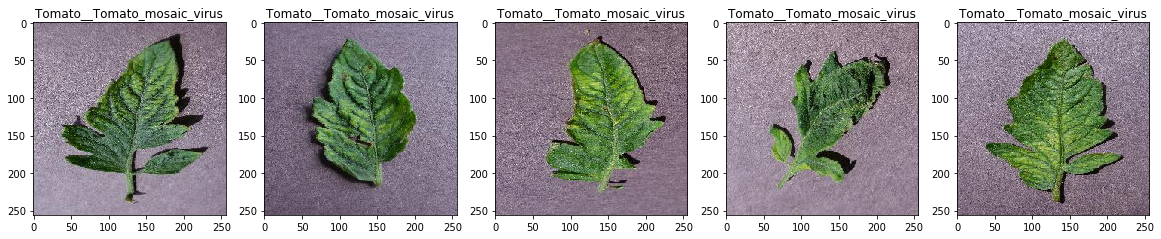

In [19]:
show_images(paths["Tomato__Tomato_mosaic_virus"], "Tomato__Tomato_mosaic_virus")

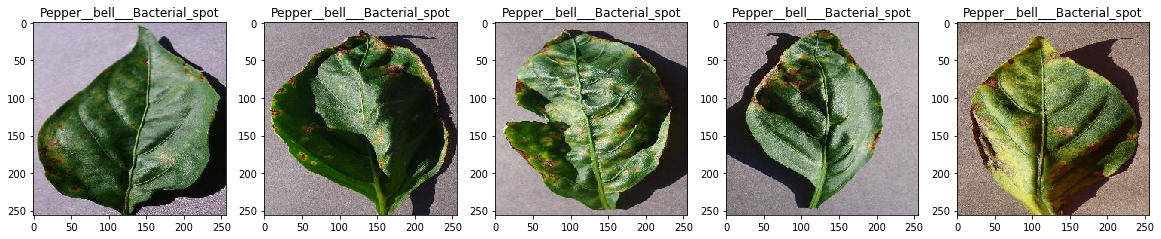

In [20]:
show_images(paths["Pepper__bell___Bacterial_spot"], "Pepper__bell___Bacterial_spot")

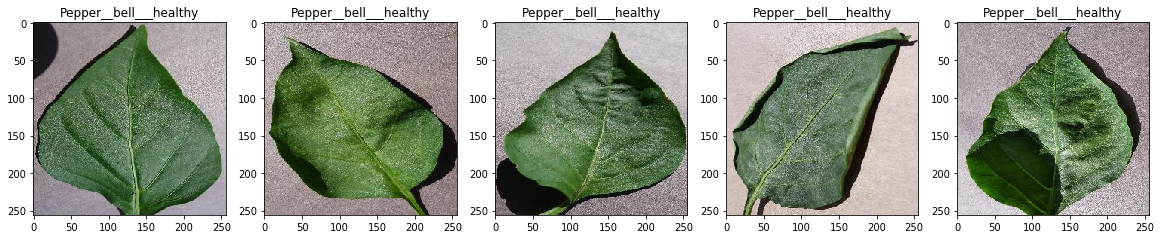

In [21]:
show_images(paths["Pepper__bell___healthy"], "Pepper__bell___healthy")

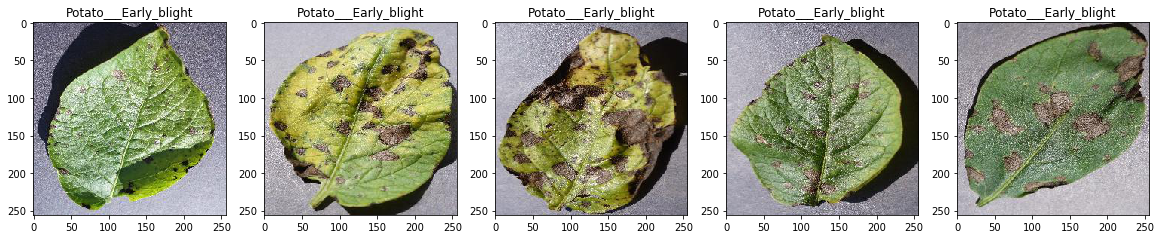

In [22]:
show_images(paths["Potato___Early_blight"], "Potato___Early_blight")

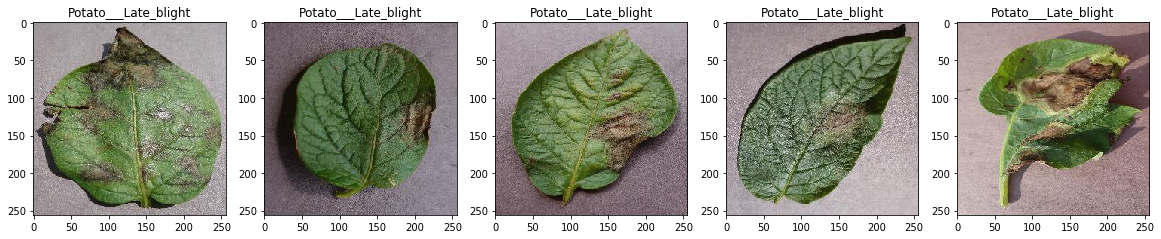

In [23]:
show_images(paths["Potato___Late_blight"], "Potato___Late_blight")

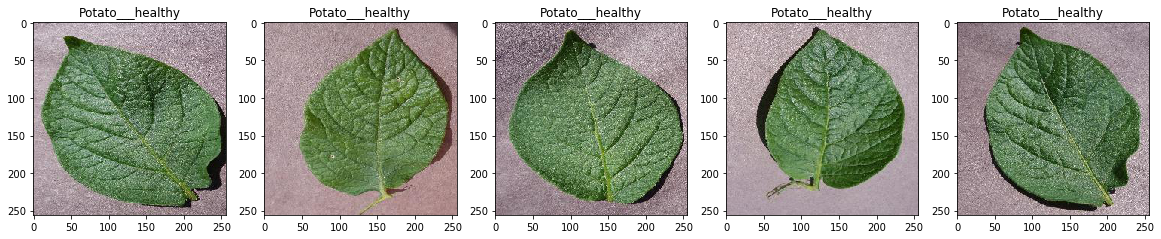

In [24]:
show_images(paths["Potato___healthy"], "Potato___healthy")

In [25]:
# We can take a pass based on these classes.  We may want to be agnostic of plant type and only classify based
# on disease, differentiating severly diseased leaves based on pepper vs tomato vs potato may be difficult.

In [26]:
import umap
import numpy as np
from tqdm import tqdm

images = []
target = []
for record in tqdm(metadata[:2500]):
    img = Image.open(os.path.join(base_path, record["class"], record["image"]))
    images.append(np.asarray(img).reshape(-1) / 255)
    target.append(record["class_num"])
    
images = np.vstack(images)
embedding = umap.UMAP(n_neighbors=4).fit_transform(images, y=target)

100%|██████████| 2500/2500 [00:09<00:00, 269.69it/s]
/home/pdoyle/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


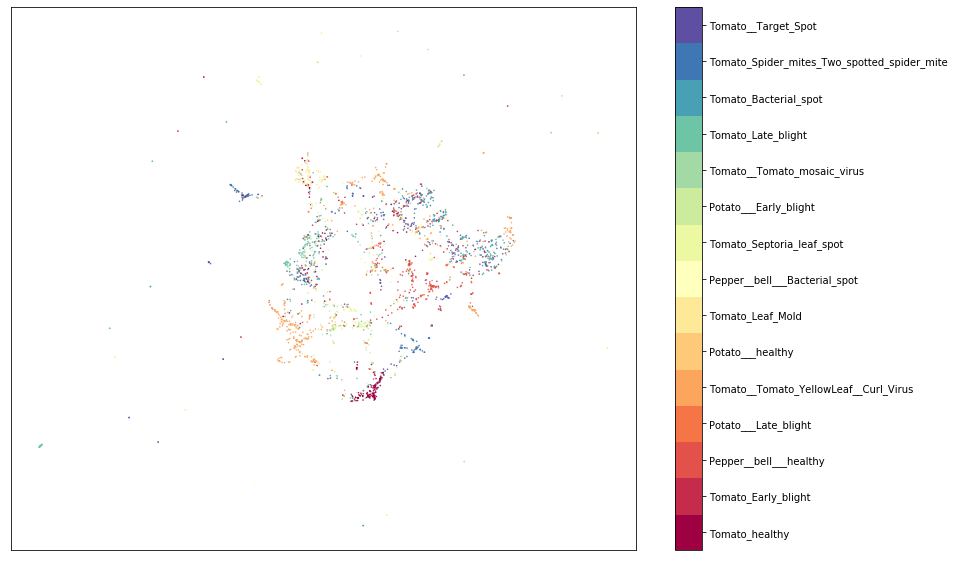

In [27]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(16)-0.5)
cbar.set_ticks(np.arange(15))

cbar.set_ticklabels(list(class_map.keys()))

In [32]:
import cv2

# Find input normalization values.
def calculate_dataset_mean_std(records, num_chans):
    pixel_num = 0
    channel_sum = np.zeros(num_chans)
    channel_sum_squared = np.zeros(num_chans)

    for record in tqdm(records):
        im_path = os.path.join(base_path, record["class"], record["image"])
        im = cv2.imread(im_path) # image in H*W*C shape, channel in BGR order
        im = im/255.0
        pixel_num += (im.size/num_chans)
        channel_sum += np.sum(im, axis=(0, 1))
        channel_sum_squared += np.sum(np.square(im), axis=(0, 1))

    bgr_mean = channel_sum / pixel_num
    bgr_std = np.sqrt(channel_sum_squared / pixel_num - np.square(bgr_mean))
    
    # change the format from bgr to rgb
    rgb_mean = list(bgr_mean)[::-1]
    rgb_std = list(bgr_std)[::-1]
    
    return rgb_mean, rgb_std

ds_means, ds_stddevs = calculate_dataset_mean_std(metadata, 3)
print(f"Mean: {ds_means}, StdDevs: {ds_stddevs}")

100%|██████████| 20637/20637 [00:47<00:00, 430.64it/s]

Mean: [0.4588092461157639, 0.47504524567664835, 0.4113254432068589], StdDevs: [0.19296615713791743, 0.1704313606215481, 0.20722290744995378]
